In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from utils import non_missing_values_table as nmv
from utils import * 
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = df = pd.read_csv('../data/df_cleaned.csv')
pd.set_option('display.max_columns', None)

In [3]:
nmv(df)

Your selected DataFrame has 55 columns.
There are 55 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,Bearer Id,float64,148506,134255
1,Start,object,148506,9988
2,Start ms,float64,148506,1000
3,End,object,148506,6401
4,End ms,float64,148506,1000
5,Dur. (s),float64,148506,87449
6,IMSI,float64,148506,103903
7,MSISDN/Number,float64,148506,106469
8,IMEI,float64,148506,106477
9,Last Location Name,object,148506,45379


In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,411762.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,37624.0,38787.0,4.117629e+08,Samsung,Samsung Galaxy A5 Sm-A520F,131.0,53.0,168.0,8.0,293.0,8.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,411762.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,168.0,3560.0,4.117629e+08,Samsung,Samsung Galaxy J5 (Sm-J530),131.0,53.0,168.0,8.0,293.0,8.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,411762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,4.117629e+08,Samsung,Samsung Galaxy A8 (2018),131.0,53.0,168.0,8.0,293.0,8.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,411762.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,45.0,5.0,44.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,3330.0,37882.0,4.117629e+08,undefined,undefined,131.0,53.0,168.0,8.0,293.0,8.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,411762.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,4.117629e+08,Samsung,Samsung Sm-G390F,131.0,53.0,168.0,8.0,293.0,8.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
# Calculate average TCP retransmission, RTT, and throughput per customer
customer_metrics = df.groupby('MSISDN/Number').agg(
    avg_tcp_retransmission_bytes=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    avg_rtt_ms=('Avg RTT DL (ms)', 'mean'),
    handset_type=('Handset Type', lambda x: x.mode()[0]),  # Most frequent handset type
    avg_throughput_kbps=('Avg Bearer TP DL (kbps)', 'mean')
).reset_index()

In [8]:
customer_metrics.head()

,MSISDN/Number,avg_tcp_retransmission_bytes,avg_rtt_ms,handset_type,avg_throughput_kbps
0,3.360100e+10,2.100477e+07,46.0,Huawei P20 Lite Huawei Nova 3E,37.0
1,3.360100e+10,2.100477e+07,30.0,Apple iPhone 7 (A1778),48.0
2,3.360100e+10,2.100477e+07,45.0,undefined,48.0
3,3.360101e+10,1.066000e+03,69.0,Apple iPhone 5S (A1457),204.0
4,3.360101e+10,1.517720e+07,57.0,Apple iPhone Se (A1723),20197.5


In [11]:
# Compute top, bottom, and most frequent values
top_tcp = df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp = df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp = df['TCP DL Retrans. Vol (Bytes)'].mode()[:10]

top_rtt = df['Avg RTT DL (ms)'].nlargest(10)
bottom_rtt = df['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_rtt = df['Avg RTT DL (ms)'].mode()[:10]

top_throughput = df['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_throughput = df['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].mode()[:10]


# display results
display("Top TCP Values:\n", top_tcp)
display("Bottom TCP Values:\n", bottom_tcp)
display("Most Frequent TCP Values:\n", most_frequent_tcp)

display("\nTop RTT Values:\n", top_rtt)
display("Bottom RTT Values:\n", bottom_rtt)
display("Most Frequent RTT Values:\n", most_frequent_rtt)

display("\nTop Throughput Values:\n", top_throughput)
display("Bottom Throughput Values:\n", bottom_throughput)
display("Most Frequent Throughput Values:\n", most_frequent_throughput)

'Top TCP Values:\n'

147    5.246207e+07
175    5.246207e+07
437    5.246207e+07
532    5.246207e+07
549    5.246207e+07
551    5.246207e+07
560    5.246207e+07
599    5.246207e+07
648    5.246207e+07
660    5.246207e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

'Bottom TCP Values:\n'

58953     2.0
123697    2.0
2841      4.0
38927     4.0
51758     4.0
59612     4.0
59662     4.0
74280     4.0
99044     4.0
141979    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

'Most Frequent TCP Values:\n'

0    2.100477e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

'\nTop RTT Values:\n'

20     253.5
30     253.5
68     253.5
154    253.5
349    253.5
383    253.5
417    253.5
463    253.5
466    253.5
469    253.5
Name: Avg RTT DL (ms), dtype: float64

'Bottom RTT Values:\n'

41923     0.0
51495     0.0
59388     0.0
60386     0.0
60578     0.0
102041    0.0
123149    0.0
141077    0.0
142427    0.0
70945     2.0
Name: Avg RTT DL (ms), dtype: float64

'Most Frequent RTT Values:\n'

0    45.0
Name: Avg RTT DL (ms), dtype: float64

'\nTop Throughput Values:\n'

321     115979.25
559     115979.25
561     115979.25
681     115979.25
826     115979.25
970     115979.25
990     115979.25
999     115979.25
1055    115979.25
1083    115979.25
Name: Avg Bearer TP DL (kbps), dtype: float64

'Bottom Throughput Values:\n'

13      0.0
149     0.0
362     0.0
540     0.0
611     0.0
672     0.0
749     0.0
801     0.0
885     0.0
1177    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

'Most Frequent Throughput Values:\n'

0    23.0
Name: Avg Bearer TP DL (kbps), dtype: float64

'\nThroughput Distribution per Handset Type:\n'

,count,mean,std,min,25%,50%,75%,max
handset_type,,,,,,,,
A-Link Telecom I. Cubot A5,1.0,23184.000000,NaN,23184.0,23184.00,23184.0,23184.000,23184.00
A-Link Telecom I. Cubot Note Plus,1.0,6527.000000,NaN,6527.0,6527.00,6527.0,6527.000,6527.00
A-Link Telecom I. Cubot Note S,1.0,8515.000000,NaN,8515.0,8515.00,8515.0,8515.000,8515.00
A-Link Telecom I. Cubot Nova,1.0,55667.000000,NaN,55667.0,55667.00,55667.0,55667.000,55667.00
A-Link Telecom I. Cubot Power,1.0,69126.000000,NaN,69126.0,69126.00,69126.0,69126.000,69126.00
...,...,...,...,...,...,...,...,...
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,2.0,44.500000,57.275649,4.0,24.25,44.5,64.750,85.00
Zyxel Communicat. Lte7460,1.0,39741.000000,NaN,39741.0,39741.00,39741.0,39741.000,39741.00
Zyxel Communicat. Sbg3600,1.0,82818.000000,NaN,82818.0,82818.00,82818.0,82818.000,82818.00



Average TCP Retransmission per Handset Type:
 handset_type
A-Link Telecom I. Cubot A5                                                             2.100477e+07
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.050372e+07
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706         

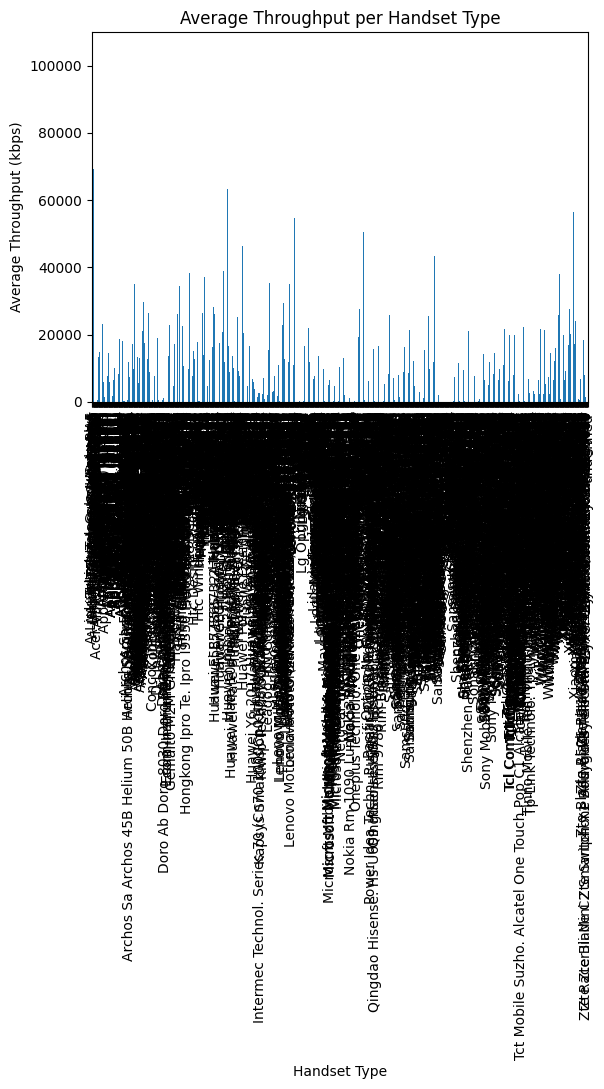

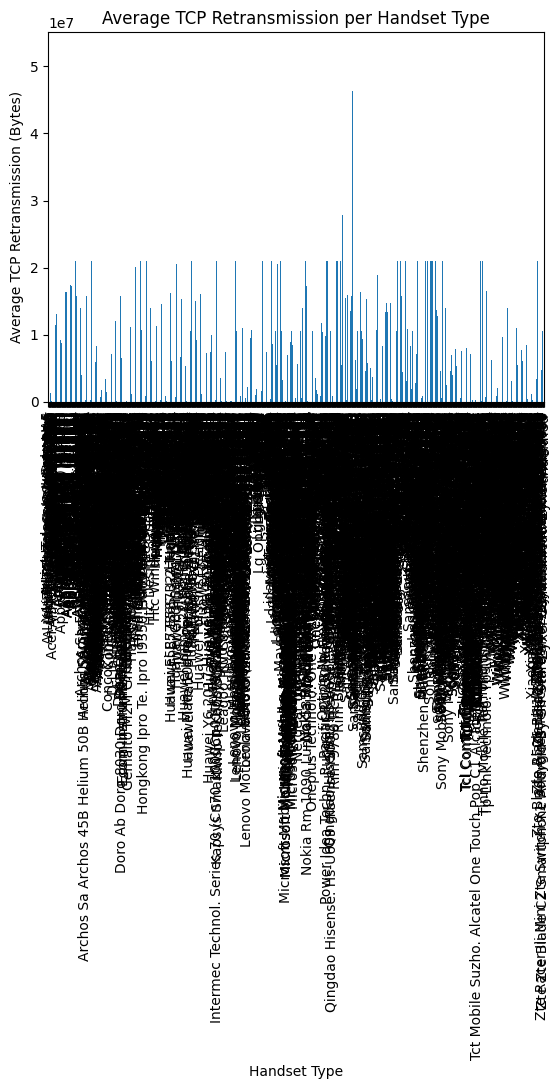

In [14]:

#  Distribution of average throughput per handset type
throughput_distribution = customer_metrics.groupby('handset_type')['avg_throughput_kbps'].describe()
display("\nThroughput Distribution per Handset Type:\n", throughput_distribution)

# Average TCP retransmission view per handset type
tcp_retransmission_view = customer_metrics.groupby('handset_type')['avg_tcp_retransmission_bytes'].mean()
display("\nAverage TCP Retransmission per Handset Type:\n", tcp_retransmission_view)

# Visualizing average throughput per handset type
throughput_distribution['mean'].plot(kind='bar', title='Average Throughput per Handset Type')
plt.
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.show()

# Visualizing average TCP retransmission per handset type
tcp_retransmission_view.plot(kind='bar', title='Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.show()

Cluster Descriptions:
         MSISDN/Number  avg_tcp_retransmission_bytes  avg_rtt_ms  \
cluster                                                            
0         3.367367e+10                  2.074404e+07   43.652786   
1         3.367561e+10                  4.424880e+06   56.488803   
2         3.367314e+10                  7.554547e+06  217.585694   

         avg_throughput_kbps  
cluster                       
0                2270.174858  
1               31554.858246  
2               10689.829456  


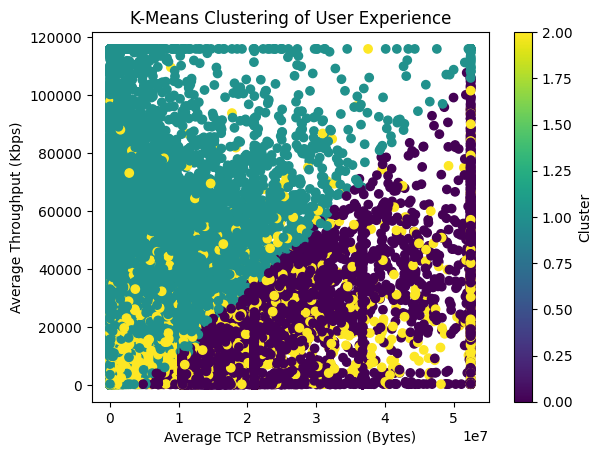

In [20]:

customer_metricss = customer_metrics.copy()
# Drop the column 'unwanted_column'
customer_metricss.drop(columns=['handset_type'], inplace=True)

# Select only numeric columns for clustering
features = customer_metricss[['avg_tcp_retransmission_bytes', 'avg_rtt_ms', 'avg_throughput_kbps']]

# K-means clustering on experience metrics
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, init='k-means++')
customer_metricss['cluster'] = kmeans.fit_predict(scaled_features)

# Describe each cluster
cluster_description = customer_metricss.groupby('cluster').mean()
print("Cluster Descriptions:")
print(cluster_description)

# Visualize clusters
plt.scatter(customer_metricss['avg_tcp_retransmission_bytes'], customer_metricss['avg_throughput_kbps'], c=customer_metricss['cluster'])
plt.title('K-Means Clustering of User Experience')
plt.xlabel('Average TCP Retransmission (Bytes)')
plt.ylabel('Average Throughput (Kbps)')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
customer_metricss.head()

,MSISDN/Number,avg_tcp_retransmission_bytes,avg_rtt_ms,avg_throughput_kbps,cluster
0,3.360100e+10,2.100477e+07,46.0,37.0,0
1,3.360100e+10,2.100477e+07,30.0,48.0,0
2,3.360100e+10,2.100477e+07,45.0,48.0,0
3,3.360101e+10,1.066000e+03,69.0,204.0,1
4,3.360101e+10,1.517720e+07,57.0,20197.5,0


In [31]:
#  Normalize metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(customer_metrics[['avg_tcp_retransmission_bytes', 'avg_rtt_ms', 'avg_throughput_kbps']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++')
customer_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)

In [32]:
customer_metrics.head()

,MSISDN/Number,avg_tcp_retransmission_bytes,avg_rtt_ms,handset_type,avg_throughput_kbps,cluster
0,3.360100e+10,2.100477e+07,46.0,Huawei P20 Lite Huawei Nova 3E,37.0,2
1,3.360100e+10,2.100477e+07,30.0,Apple iPhone 7 (A1778),48.0,2
2,3.360100e+10,2.100477e+07,45.0,undefined,48.0,2
3,3.360101e+10,1.066000e+03,69.0,Apple iPhone 5S (A1457),204.0,0
4,3.360101e+10,1.517720e+07,57.0,Apple iPhone Se (A1723),20197.5,2
